# Content-Based Retail Product Recommendation Project

## 📂 Dataset
This project uses the **synthetic dataset "Retail Product Recommendation" (retail_product_recommendation.csv)**.  
The dataset simulates a retail environment and contains:
- `product_id` : unique product identifier  
- `title` : product name/title  
- `description` : product description text  
- `category` : product category (e.g., Electronics, Fitness, etc.)

Source: [Kaggle – Retail Product Recommendation Dataset](https://www.kaggle.com/) *(synthetic demo dataset)*

---

## 🎯 Project Goal
Build and evaluate a **content-based recommender system** that suggests similar retail products based on text features.

---

## 🛠️ What We Will Do
1. **EDA (Exploratory Data Analysis)**  
   - Explore dataset structure, missing values, and distributions  
   - Visualize category and title frequencies  

2. **Text Representation**  
   - Apply **TF-IDF vectorization** (title + description + category)  
   - Experiment with n-grams and stopwords  

3. **Similarity Computation**  
   - Calculate **cosine similarity** across products  
   - Build a similarity matrix (1000 × 1000)  

4. **Recommendation Function**  
   - Given a product, recommend top-N most similar products  
   - Add category filtering and exclusion options  

5. **Diversity Enhancement**  
   - Implement **MMR (Maximal Marginal Relevance)** to balance relevance vs. diversity  

6. **Free-Text Search**  
   - Enter a query and find most relevant products  

7. **Streamlit Web App**  
   - Build an interactive app to upload CSV, search, and explore recommendations  
   - Add CSV download for recommendation results  

---

## ✅ Expected Outcomes
- Hands-on understanding of **content-based recommender systems**  
- End-to-end pipeline: **EDA → Modeling → Evaluation → Streamlit app**  
- Ready-to-use GitHub repository and LinkedIn shareable project


In [1]:
import pandas as pd

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9009-43D9

 Directory of C:\Users\H�lya\OneDrive - CAKABEY OKULLARI\Masa�st�\perakende

01.09.2025  14:37    <DIR>          .
01.09.2025  14:37    <DIR>          ..
01.09.2025  14:37    <DIR>          .ipynb_checkpoints
03.04.2025  00:18            92.417 retail_product_recommendation.csv
01.09.2025  14:37               337 Untitled.ipynb
               2 File(s)         92.754 bytes
               3 Dir(s)  35.135.651.840 bytes free


In [3]:
df = pd.read_csv("retail_product_recommendation.csv")

In [4]:
df.head()

,product_id,title,description,category
0,P1000,Gaming Mouse,Shockproof and stylish smartphone case compati...,Gaming
1,P1001,Smartphone Case,High-precision gaming mouse with customizable ...,Fitness
2,P1002,Gaming Mouse,Eco-friendly and non-slip yoga mat with extra ...,Sportswear
3,P1003,Smartphone Case,Compact digital alarm clock with multiple alar...,Home Decor
4,P1004,Digital Alarm Clock,Double-walled bottle keeps drinks hot or cold ...,Electronics


In [5]:
df.tail()

,product_id,title,description,category
995,P1995,Gaming Mouse,Portable Bluetooth speaker with excellent bass...,Home Decor
996,P1996,Digital Alarm Clock,Double-walled bottle keeps drinks hot or cold ...,Home Audio
997,P1997,Wireless Headphones,Freshly roasted organic coffee beans for rich ...,Kitchen
998,P1998,Smartphone Case,Shockproof and stylish smartphone case compati...,Home Decor
999,P1999,Bluetooth Speaker,High-precision gaming mouse with customizable ...,Kitchen


In [6]:
df.columns

Index(['product_id', 'title', 'description', 'category'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   1000 non-null   object
 1   title        1000 non-null   object
 2   description  1000 non-null   object
 3   category     1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [8]:
df.isnull().sum()

product_id     0
title          0
description    0
category       0
dtype: int64

In [10]:
df.describe()

,product_id,title,description,category
count,1000,1000,1000,1000
unique,1000,10,10,10
top,P1000,Stainless Steel Bottle,Shockproof and stylish smartphone case compati...,Kitchen
freq,1,107,112,121


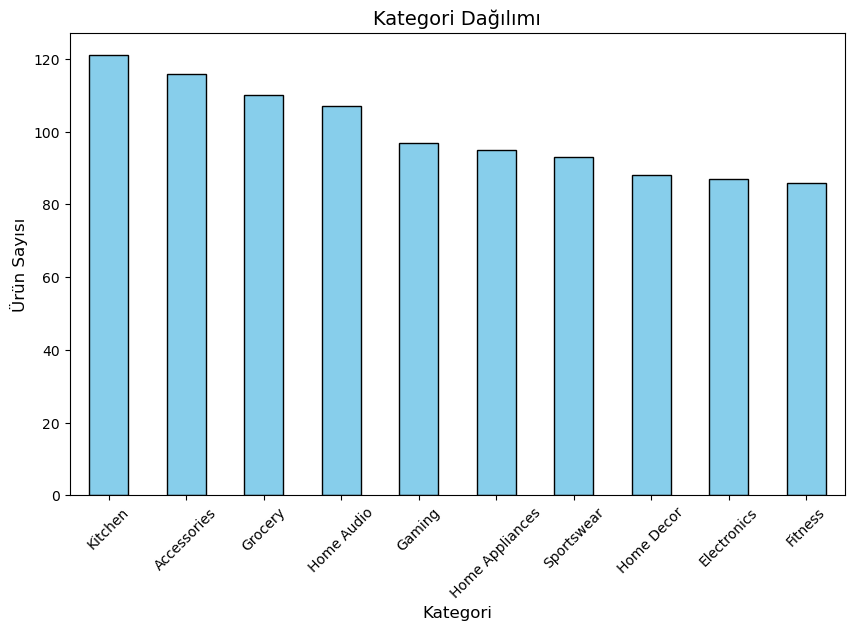

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku (senin dosya yoluna göre güncelle)
df = pd.read_csv("retail_product_recommendation.csv")

# Kategori dağılımı
category_counts = df['category'].value_counts()

# Grafik
plt.figure(figsize=(10,6))
category_counts.plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Kategori Dağılımı", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Ürün Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.show()


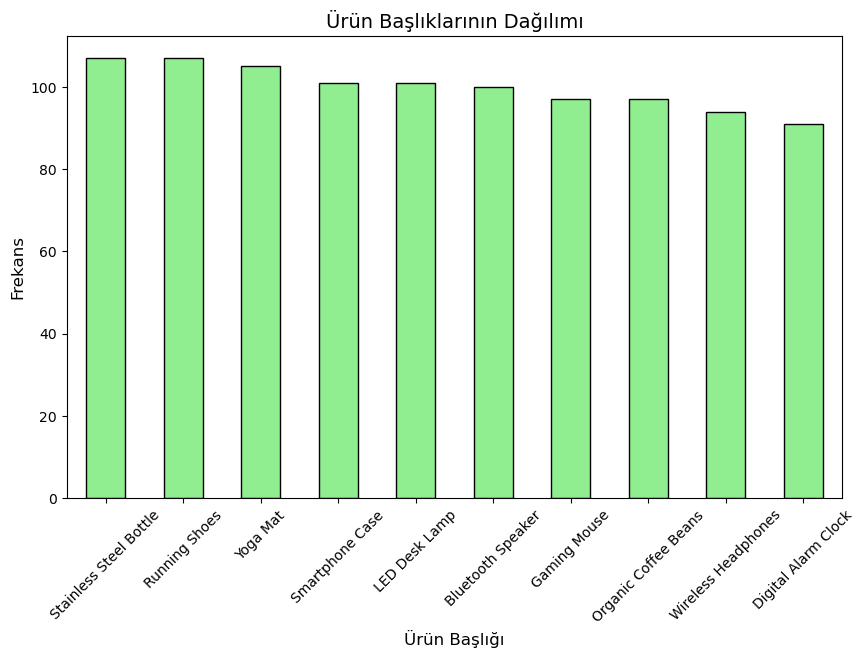

In [13]:
plt.figure(figsize=(10,6))
df['title'].value_counts().plot(kind='bar', color="lightgreen", edgecolor="black")
plt.title("Ürün Başlıklarının Dağılımı", fontsize=14)
plt.xlabel("Ürün Başlığı", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)
plt.show()


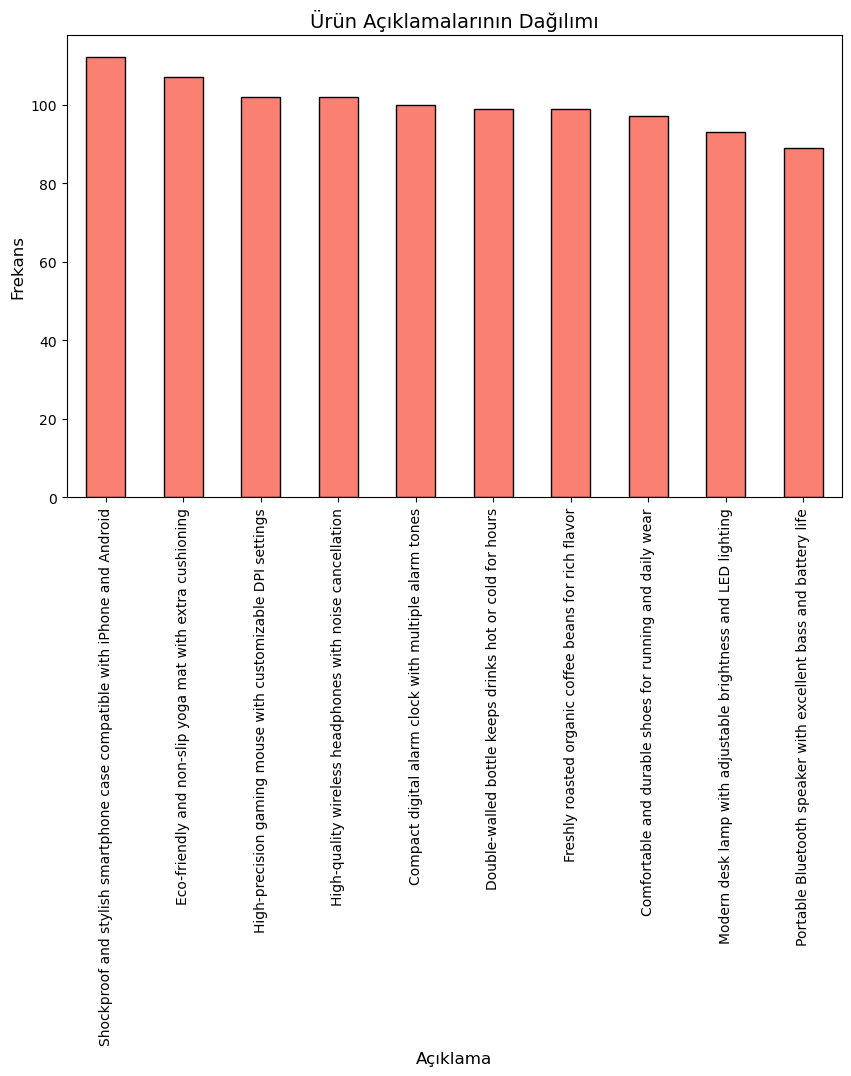

In [14]:
plt.figure(figsize=(10,6))
df['description'].value_counts().plot(kind='bar', color="salmon", edgecolor="black")
plt.title("Ürün Açıklamalarının Dağılımı", fontsize=14)
plt.xlabel("Açıklama", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [15]:
print("Kategori Sayısı:", df['category'].nunique())
print("Başlık Sayısı:", df['title'].nunique())
print("Açıklama Sayısı:", df['description'].nunique())

print("\nEn çok geçen kategoriler:")
print(df['category'].value_counts().head())

print("\nEn çok geçen ürün başlıkları:")
print(df['title'].value_counts().head())

print("\nEn çok geçen açıklamalar:")
print(df['description'].value_counts().head())


Kategori Sayısı: 10
Başlık Sayısı: 10
Açıklama Sayısı: 10

En çok geçen kategoriler:
category
Kitchen        121
Accessories    116
Grocery        110
Home Audio     107
Gaming          97
Name: count, dtype: int64

En çok geçen ürün başlıkları:
title
Stainless Steel Bottle    107
Running Shoes             107
Yoga Mat                  105
Smartphone Case           101
LED Desk Lamp             101
Name: count, dtype: int64

En çok geçen açıklamalar:
description
Shockproof and stylish smartphone case compatible with iPhone and Android    112
Eco-friendly and non-slip yoga mat with extra cushioning                     107
High-precision gaming mouse with customizable DPI settings                   102
High-quality wireless headphones with noise cancellation                     102
Compact digital alarm clock with multiple alarm tones                        100
Name: count, dtype: int64


In [16]:
pivot_table = df.pivot_table(index="category", columns="title", values="product_id", aggfunc="count", fill_value=0)
print(pivot_table)


title            Bluetooth Speaker  Digital Alarm Clock  Gaming Mouse  \
category                                                                
Accessories                     14                   10            13   
Electronics                      4                    9            11   
Fitness                          7                    8             8   
Gaming                           6                   10             8   
Grocery                         13                   11            12   
Home Appliances                 11                    9             6   
Home Audio                       8                    8             5   
Home Decor                      13                   10            12   
Kitchen                         14                    9            10   
Sportswear                      10                    7            12   

title            LED Desk Lamp  Organic Coffee Beans  Running Shoes  \
category                                            

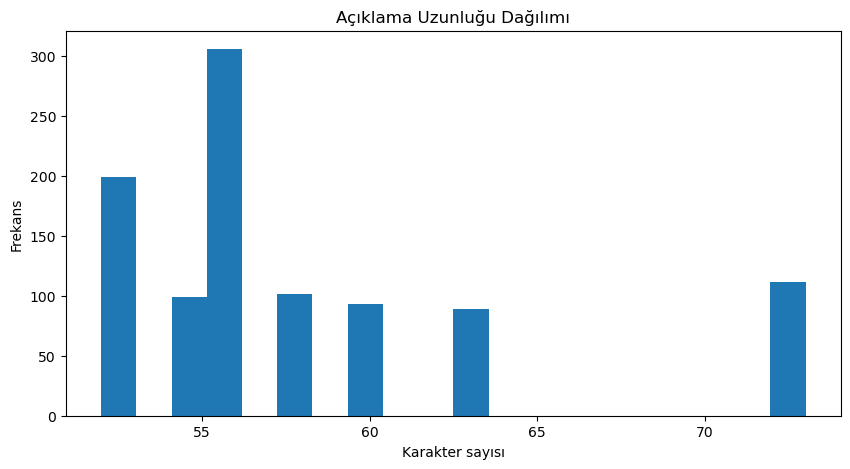

,category,title,desc_len
count,1000,1000,1000.000000
unique,10,10,NaN
top,Kitchen,Stainless Steel Bottle,NaN
freq,121,107,NaN
mean,NaN,NaN,58.308000
std,NaN,NaN,5.993084
min,NaN,NaN,52.000000
25%,NaN,NaN,55.000000
50%,NaN,NaN,56.000000
75%,NaN,NaN,60.000000


In [17]:
# Açıklama uzunluğu
df["desc_len"] = df["description"].str.len()
plt.figure(figsize=(10,5))
df["desc_len"].plot(kind="hist", bins=20)
plt.title("Açıklama Uzunluğu Dağılımı")
plt.xlabel("Karakter sayısı"); plt.ylabel("Frekans")
plt.show()

df[["category","title","desc_len"]].describe(include="all")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text = (df["title"].astype(str) + " | " 
        + df["description"].astype(str) + " | " 
        + df["category"].astype(str))

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=1)
X = vectorizer.fit_transform(text)
cos_sim = cosine_similarity(X, X)

X.shape, cos_sim.shape


((1000, 317), (1000, 1000))

Çıktının Yorumu

((1000, 317), (1000, 1000))

(1000, 317) → TF-IDF matrisi: 1000 ürün, 317 kelime/kelime grubu.

(1000, 1000) → Cosine similarity matrisi: her ürünün her ürünle benzerliği.

In [19]:
import numpy as np
import pandas as pd

def recommend(idx, topn=5):
    """
    idx: öneri yapılacak ürünün satır indeksi
    topn: kaç tane benzer ürün gösterilecek
    """
    # seçilen ürünün similarity satırı
    sims = list(enumerate(cos_sim[idx]))
    
    # benzerlik değerine göre sırala (yüksekten düşüğe)
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    
    # kendisini çıkar (ilk eleman genelde kendisi = 1.0)
    sims = [x for x in sims if x[0] != idx]
    
    # en benzer topn ürün
    sims = sims[:topn]
    
    # sonuç dataframe
    rec = pd.DataFrame({
        "rank": np.arange(1, len(sims)+1),
        "product_id": [df.iloc[i]["product_id"] for i, _ in sims],
        "title": [df.iloc[i]["title"] for i, _ in sims],
        "category": [df.iloc[i]["category"] for i, _ in sims],
        "similarity": [round(float(s),3) for _, s in sims]
    })
    return rec

# 🔍 örnek: ilk ürün için öneriler
print("Seçilen ürün:", df.iloc[0][["product_id","title","category"]].to_dict())
recommend(0, topn=5)


Seçilen ürün: {'product_id': 'P1000', 'title': 'Gaming Mouse', 'category': 'Gaming'}


,rank,product_id,title,category,similarity
0,1,P1301,Gaming Mouse,Kitchen,0.833
1,2,P1334,Gaming Mouse,Accessories,0.832
2,3,P1545,Gaming Mouse,Accessories,0.832
3,4,P1829,Gaming Mouse,Accessories,0.832
4,5,P1571,Gaming Mouse,Grocery,0.832


In [20]:
import numpy as np
import pandas as pd

def recommend(idx, topn=5, same_category=False, backfill=True):
    """
    idx: ürün satır indeksi
    topn: kaç öneri
    same_category: True ise önce aynı kategoriden doldur
    backfill: aynı kategoride yetersiz kalırsa genel listeden tamamla
    """
    sims = list(enumerate(cos_sim[idx]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    sims = [x for x in sims if x[0] != idx]  # kendisini çıkar

    if not same_category:
        sims = sims[:topn]
    else:
        base_cat = df.iloc[idx]["category"]
        same_cat = [x for x in sims if df.iloc[x[0]]["category"] == base_cat]
        out = same_cat[:topn]
        if backfill and len(out) < topn:
            # aynı kategoride yetmediyse farklı kategorilerden en benzerleriyle tamamla
            remain = [x for x in sims if x not in out]
            out = out + remain[: (topn - len(out))]
        sims = out

    rec = pd.DataFrame({
        "rank": np.arange(1, len(sims)+1),
        "product_id": [df.iloc[i]["product_id"] for i,_ in sims],
        "title": [df.iloc[i]["title"] for i,_ in sims],
        "category": [df.iloc[i]["category"] for i,_ in sims],
        "similarity": [float(s) for _, s in sims]
    })
    return rec

# örnek kullanım
i = 0  # ya da istediğin indeks
print("Seçilen ürün:", df.iloc[i][["product_id","title","category"]].to_dict())
display(recommend(i, topn=5, same_category=True))


Seçilen ürün: {'product_id': 'P1000', 'title': 'Gaming Mouse', 'category': 'Gaming'}


,rank,product_id,title,category,similarity
0,1,P1145,Smartphone Case,Gaming,0.790671
1,2,P1168,Smartphone Case,Gaming,0.790671
2,3,P1303,Wireless Headphones,Gaming,0.768548
3,4,P1360,Wireless Headphones,Gaming,0.768548
4,5,P1373,Wireless Headphones,Gaming,0.768548


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# üç ayrı vektörleştirici
tf_title = TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=1)
tf_desc  = TfidfVectorizer(stop_words="english", ngram_range=(1,2), min_df=1)
tf_cat   = TfidfVectorizer(stop_words="english", ngram_range=(1,1), min_df=1)

X_title = tf_title.fit_transform(df["title"].astype(str))
X_desc  = tf_desc.fit_transform(df["description"].astype(str))
X_cat   = tf_cat.fit_transform(df["category"].astype(str))

S_title = cosine_similarity(X_title, X_title)
S_desc  = cosine_similarity(X_desc,  X_desc)
S_cat   = cosine_similarity(X_cat,   X_cat)

def build_weighted_similarity(w_title=0.2, w_desc=0.7, w_cat=0.1):
    # Ağırlıklar toplamı 1 olsun
    total = w_title + w_desc + w_cat
    w_title, w_desc, w_cat = w_title/total, w_desc/total, w_cat/total
    return w_title*S_title + w_desc*S_desc + w_cat*S_cat

cos_sim_w = build_weighted_similarity(w_title=0.25, w_desc=0.65, w_cat=0.10)

def recommend_w(idx, topn=5, same_category=False, backfill=True, sim_matrix=None):
    sim_matrix = sim_matrix if sim_matrix is not None else cos_sim_w
    sims = list(enumerate(sim_matrix[idx]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)
    sims = [x for x in sims if x[0] != idx]

    if not same_category:
        sims = sims[:topn]
    else:
        base_cat = df.iloc[idx]["category"]
        same_cat = [x for x in sims if df.iloc[x[0]]["category"] == base_cat]
        out = same_cat[:topn]
        if backfill and len(out) < topn:
            remain = [x for x in sims if x not in out]
            out = out + remain[: (topn - len(out))]
        sims = out

    return pd.DataFrame({
        "rank": np.arange(1, len(sims)+1),
        "product_id": [df.iloc[i]["product_id"] for i,_ in sims],
        "title": [df.iloc[i]["title"] for i,_ in sims],
        "category": [df.iloc[i]["category"] for i,_ in sims],
        "similarity": [float(s) for _, s in sims]
    })

# örnek karşılaştırma
i = 0
print("Seçilen ürün:", df.iloc[i][["product_id","title","category"]].to_dict())
print("\n— Saf birleşik metin (önceki cos_sim) + kategori filtresi")
display(recommend(i, topn=5, same_category=True))

print("\n— Ağırlıklı (title/desc/category) + kategori filtresi")
display(recommend_w(i, topn=5, same_category=True))


Seçilen ürün: {'product_id': 'P1000', 'title': 'Gaming Mouse', 'category': 'Gaming'}

— Saf birleşik metin (önceki cos_sim) + kategori filtresi


,rank,product_id,title,category,similarity
0,1,P1145,Smartphone Case,Gaming,0.790671
1,2,P1168,Smartphone Case,Gaming,0.790671
2,3,P1303,Wireless Headphones,Gaming,0.768548
3,4,P1360,Wireless Headphones,Gaming,0.768548
4,5,P1373,Wireless Headphones,Gaming,0.768548



— Ağırlıklı (title/desc/category) + kategori filtresi


,rank,product_id,title,category,similarity
0,1,P1024,Yoga Mat,Gaming,0.75
1,2,P1145,Smartphone Case,Gaming,0.75
2,3,P1165,Stainless Steel Bottle,Gaming,0.75
3,4,P1168,Smartphone Case,Gaming,0.75
4,5,P1303,Wireless Headphones,Gaming,0.75


In [22]:
import numpy as np
import pandas as pd
from itertools import combinations

# --- metrikler ---

def category_consistency_at_k(sim_matrix, k=5, sample=300):
    """
    Önerilen ürünlerin, seçilen ürünle aynı kategoride olma oranı
    """
    idxs = np.random.choice(len(df), size=min(sample, len(df)), replace=False)
    hits, total = 0, 0
    for i in idxs:
        sims = list(enumerate(sim_matrix[i]))
        sims = sorted([x for x in sims if x[0] != i], key=lambda x: x[1], reverse=True)[:k]
        cats = [df.iloc[j]["category"] for j,_ in sims]
        hits += sum(c == df.iloc[i]["category"] for c in cats)
        total += len(cats)
    return hits/total if total else 0.0

def ild_at_k(sim_matrix, k=5, sample=200):
    """
    Intra-list diversity (çeşitlilik): öneriler birbirine ne kadar benzemiyor?
    1 - ortalama iç benzerlik
    """
    idxs = np.random.choice(len(df), size=min(sample, len(df)), replace=False)
    sims_list = []
    for i in idxs:
        sims = list(enumerate(sim_matrix[i]))
        sims = sorted([x for x in sims if x[0] != i], key=lambda x: x[1], reverse=True)[:k]
        inds = [j for j,_ in sims]
        pair_sims = [sim_matrix[a,b] for a,b in combinations(inds,2)]
        if pair_sims:
            sims_list.append(np.mean(pair_sims))
    if not sims_list:
        return 0.0
    return 1 - np.mean(sims_list)

def coverage_at_k(sim_matrix, k=5, sample=None):
    """
    Kaç farklı ürün en az birinin öneri listesinde görünüyor?
    """
    idxs = np.arange(len(df)) if sample is None else np.random.choice(len(df), size=min(sample, len(df)), replace=False)
    appeared = set()
    for i in idxs:
        sims = list(enumerate(sim_matrix[i]))
        sims = sorted([x for x in sims if x[0] != i], key=lambda x: x[1], reverse=True)[:k]
        appeared.update([df.iloc[j]["product_id"] for j,_ in sims])
    return len(appeared) / len(df)


In [23]:
print("=== Saf birleşik metin (cos_sim) ===")
print("CategoryConsistency@5:", round(category_consistency_at_k(cos_sim, 5), 3))
print("ILD@5:", round(ild_at_k(cos_sim, 5), 3))
print("Coverage@5:", round(coverage_at_k(cos_sim, 5), 3))

print("\n=== Ağırlıklı (title/desc/category) ===")
print("CategoryConsistency@5:", round(category_consistency_at_k(cos_sim_w, 5), 3))
print("ILD@5:", round(ild_at_k(cos_sim_w, 5), 3))
print("Coverage@5:", round(coverage_at_k(cos_sim_w, 5), 3))


=== Saf birleşik metin (cos_sim) ===
CategoryConsistency@5: 0.224
ILD@5: 0.146
Coverage@5: 0.931

=== Ağırlıklı (title/desc/category) ===
CategoryConsistency@5: 0.205
ILD@5: 0.088
Coverage@5: 0.9
